# SERIES DE TIEMPO

Datos estadísticos que se recopilan, observan o registran en intervalos de tiempo regulares.

Secuencia de datos u observaciones, medidos en determinados momentos y ordenados cronológicamente. Visualmente, es una curva que evoluciona en el tiempo.


In [53]:
import pandas as pd
pd.options.display.float_format = '{:_.2f}'.format

df = pd.read_csv('files/covid_19_data.csv')
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.00,0.00,0.00
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.00,0.00,0.00
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.00,0.00,0.00
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.00,0.00,0.00


In [54]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Convirtiendo a tipo *datetime*

In [55]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

Tomando las columnasd de interés

In [56]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [57]:
df = df[['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
df.head(4)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.00,0.00,0.00
1,2020-01-22,Mainland China,14.00,0.00,0.00
2,2020-01-22,Mainland China,6.00,0.00,0.00
3,2020-01-22,Mainland China,1.00,0.00,0.00


Agrupando por fecha

In [58]:
df_time = df.groupby('ObservationDate').sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.00,17.00,30.00
2020-01-23,1_097.00,34.00,60.00
2020-01-24,941.00,26.00,39.00
2020-01-25,1_437.00,42.00,42.00
2020-01-26,2_118.00,56.00,56.00
...,...,...,...
2021-05-25,167_848_207.00,3_485_788.00,104_824_935.00
2021-05-26,168_416_423.00,3_498_544.00,105_380_748.00
2021-05-27,168_970_791.00,3_511_297.00,106_078_106.00


Restar cada día con el día previo

In [59]:
df_diff = df_time.diff()
df_diff
# La primer fila es Nan

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.00,17.00,30.00
2020-01-24,-156.00,-8.00,-21.00
2020-01-25,496.00,16.00,3.00
2020-01-26,681.00,14.00,14.00
...,...,...,...
2021-05-25,531_845.00,12_752.00,577_063.00
2021-05-26,568_216.00,12_756.00,555_813.00
2021-05-27,554_368.00,12_753.00,697_358.00


Corrigiendo la primer fila de NaN

In [60]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [61]:
df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered': 30.0},
 inplace=True)
df_diff.head(4)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.00,17.00,30.00
2020-01-23,540.00,17.00,30.00
2020-01-24,-156.00,-8.00,-21.00
2020-01-25,496.00,16.00,3.00


Nos permite obtener el DF original usando *cumsum*

In [62]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.00,17.00,30.00
2020-01-23,1_097.00,34.00,60.00
2020-01-24,941.00,26.00,39.00
2020-01-25,1_437.00,42.00,42.00
2020-01-26,2_118.00,56.00,56.00
...,...,...,...
2021-05-25,167_848_207.00,3_485_788.00,104_824_935.00
2021-05-26,168_416_423.00,3_498_544.00,105_380_748.00
2021-05-27,168_970_791.00,3_511_297.00,106_078_106.00


Estimaciones estadísticas en intervalos de tiempo de 7 días

In [63]:
df_diff.resample('7D').sum().head(4)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5_578.00,131.00,108.00
2020-01-29,18_314.00,361.00,749.00
2020-02-05,20_911.00,621.00,3_827.00
2020-02-12,30_335.00,894.00,9_668.00


El intervalo se establece cada domingo

In [64]:
df_diff.resample('W-sun').sum().head(4)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2_118.00,56.00,56.00
2020-02-02,14_669.00,306.00,420.00
2020-02-09,23_364.00,544.00,2_769.00
2020-02-16,31_075.00,864.00,7_621.00


Intervalo mensual

In [65]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9_925.00,213.00,225.00
2020-02-29,76_087.00,2_728.00,39_556.00
2020-03-31,771_462.00,39_242.00,138_226.00
2020-04-30,2_401_731.00,192_394.00,837_095.00
2020-05-31,2_910_561.00,138_242.00,1_626_127.00
2020-06-30,4_319_842.00,138_411.00,2_711_439.00
2020-07-31,7_127_806.00,168_508.00,5_019_965.00
2020-08-31,7_909_780.00,171_272.00,6_449_484.00
2020-09-30,8_504_867.00,163_907.00,6_847_448.00


Intervalos de 12 horas generan NaN.

sum() me genera 0 por defecto cuando no hay datos pero puedo indicarle que debe tener aunque sea un dato para realizar la suma.

In [66]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.00,17.00,30.00
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1_097.00,34.00,60.00
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.00,26.00,39.00
...,...,...,...
2021-05-27 00:00:00,168_970_791.00,3_511_297.00,106_078_106.00
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169_470_725.00,3_523_117.00,106_633_069.00


Rellenando los valores nulos con interpolación

In [67]:
df_cum.interpolate(inplace=True)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.00,17.00,30.00
2020-01-22 12:00:00,827.00,25.50,45.00
2020-01-23 00:00:00,1_097.00,34.00,60.00
2020-01-23 12:00:00,1_019.00,30.00,49.50
2020-01-24 00:00:00,941.00,26.00,39.00
...,...,...,...
2021-05-27 00:00:00,168_970_791.00,3_511_297.00,106_078_106.00
2021-05-27 12:00:00,169_220_758.00,3_517_207.00,106_355_587.50
2021-05-28 00:00:00,169_470_725.00,3_523_117.00,106_633_069.00


In [68]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.00,17.00,30.00,0.97
2020-01-22 12:00:00,827.00,25.50,45.00,0.97
2020-01-23 00:00:00,1_097.00,34.00,60.00,0.97
2020-01-23 12:00:00,1_019.00,30.00,49.50,0.97
2020-01-24 00:00:00,941.00,26.00,39.00,0.97
...,...,...,...,...
2021-05-27 00:00:00,168_970_791.00,3_511_297.00,106_078_106.00,0.98
2021-05-27 12:00:00,169_220_758.00,3_517_207.00,106_355_587.50,0.98
2021-05-28 00:00:00,169_470_725.00,3_523_117.00,106_633_069.00,0.98


Ahora. Cómo extraer información si la variable tipo tiempo no es el índice sino una variable más.

In [69]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.00,17.00,30.00,0.97
1,2020-01-22 12:00:00,827.00,25.50,45.00,0.97
2,2020-01-23 00:00:00,1_097.00,34.00,60.00,0.97
3,2020-01-23 12:00:00,1_019.00,30.00,49.50,0.97
4,2020-01-24 00:00:00,941.00,26.00,39.00,0.97
...,...,...,...,...,...
982,2021-05-27 00:00:00,168_970_791.00,3_511_297.00,106_078_106.00,0.98
983,2021-05-27 12:00:00,169_220_758.00,3_517_207.00,106_355_587.50,0.98
984,2021-05-28 00:00:00,169_470_725.00,3_523_117.00,106_633_069.00,0.98
985,2021-05-28 12:00:00,169_711_142.50,3_528_368.00,106_886_869.00,0.98


Usando Groupby especial para usar con series de tiempo

In [70]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.97
2020-02-29,0.97
2020-03-31,0.96
2020-04-30,0.94
2020-05-31,0.93
2020-06-30,0.95
2020-07-31,0.96
2020-08-31,0.96
2020-09-30,0.97


<AxesSubplot:xlabel='ObservationDate'>

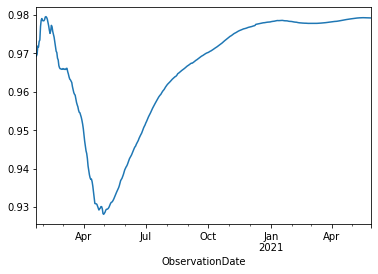

In [72]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()
# Al poner 'rate' solo con un corchete se genera una serie y no un dataframe

<AxesSubplot:xlabel='ObservationDate'>

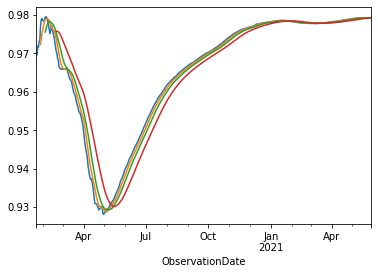

In [74]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()
sr.rolling(window=30).mean().plot()